# Player Analysis

In [412]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Taking in consideration only KKR V CSK matches

In [413]:
df1 = pd.read_csv("matches.csv")
df2 = pd.read_csv("deliveries.csv")

df1.rename(columns={"id" : 'match_id'}, inplace=True)

matches= pd.merge(df1, df2, on='match_id', how='outer')

In [414]:
matches.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [415]:
matches = matches[['match_id', 'season','team1', 'team2', 'toss_winner','toss_decision','dl_applied','winner',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman','non_striker', 'bowler','wide_runs','bye_runs', 'legbye_runs','noball_runs','penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind']]

matches.shape

(179078, 26)

In [416]:
matches.head()

,match_id,season,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
2,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,4,0,4,NaN,NaN
3,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
4,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,2,0,0,0,0,0,2,2,NaN,NaN


## Taking in consideration only KKR VS CSK matches

In [417]:
KKR_CSK= matches[np.logical_or(np.logical_and(matches['team1']=='Kolkata Knight Riders',matches['team2']=='Chennai Super Kings'),
                            np.logical_and(matches['team2']=='Kolkata Knight Riders',matches['team1']=='Chennai Super Kings'))]
KKR_CSK = KKR_CSK[KKR_CSK["dl_applied"]==0]

In [418]:
KKR_CSK.match_id.nunique()

18

In [419]:
KKR_CSK.season.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2018, 2019],
      dtype=int64)

## Balls KKR will take more or less to reach 75 then CSK

- Chennai Super Kings

In [420]:
chennai = KKR_CSK[KKR_CSK["batting_team"]=="Chennai Super Kings"]

In [421]:
chennai_runs = chennai.groupby(["match_id"]).agg({ "total_runs":"sum"})

print("Runs scored by CSK overall :")

chennai_runs

Runs scored by CSK overall :


,total_runs
match_id,
71,152
166,188
182,164
222,143
235,153
347,139
368,160
381,190
406,124


Balls CSK take to score their first 75 runs :

In [422]:
balls =[]
for value in chennai.groupby("match_id"):
    count = 0
    runs = 0
    d = list(value[1]["total_runs"])
    for i in d: 
        if runs <75:
            runs=runs+i
            count = count+1
            
    balls.append(count)
    
balls

[62, 53, 76, 45, 58, 65, 49, 55, 96, 45, 56, 77, 46, 65, 34, 47, 80, 64]

In [423]:
chennai_runs["balls for 75 (CSK)"] = balls

chennai_runs.reset_index(inplace = True)

print("Balls taken by CSK for 75 team's run :")
chennai_runs

Balls taken by CSK for 75 team's run :


,match_id,total_runs,balls for 75 (CSK)
0,71,152,62
1,166,188,53
2,182,164,76
3,222,143,45
4,235,153,58
5,347,139,65
6,368,160,49
7,381,190,55
8,406,124,96
9,418,200,45


- Kolkata Knight Riders

In [424]:
kolkata = KKR_CSK[KKR_CSK["batting_team"]=="Kolkata Knight Riders"]

In [425]:
kolkata_runs = kolkata.groupby(["match_id"]).agg({ "total_runs":"sum"})

print("Runs scored by KKR overall :")

kolkata_runs

Runs scored by KKR overall :


,total_runs
match_id,
71,147
166,189
182,109
222,139
235,151
347,140
368,158
381,192
406,119


Balls KKR take to score their first 75 runs :

In [426]:
balls =[]
for value in kolkata.groupby("match_id"):
    count = 0
    runs = 0
    d = list(value[1]["total_runs"])
    for i in d: 
        if runs <75:
            runs=runs+i
            count = count+1
            
    balls.append(count)
    
balls

[68, 55, 73, 78, 62, 75, 51, 50, 75, 55, 78, 54, 71, 71, 47, 51, 93, 54]

In [427]:
kolkata_runs["balls for 75 (KKR)"] = balls

kolkata_runs.reset_index(inplace = True)

print("Balls taken by KKR for 75 team's run :")
kolkata_runs

Balls taken by KKR for 75 team's run :


,match_id,total_runs,balls for 75 (KKR)
0,71,147,68
1,166,189,55
2,182,109,73
3,222,139,78
4,235,151,62
5,347,140,75
6,368,158,51
7,381,192,50
8,406,119,75
9,418,186,55


In [428]:
final = pd.merge(chennai_runs,kolkata_runs,on = "match_id",how = "inner")
final = final.drop(["total_runs_x","total_runs_y"],axis = 1)

In [429]:
final

,match_id,balls for 75 (CSK),balls for 75 (KKR)
0,71,62,68
1,166,53,55
2,182,76,73
3,222,45,78
4,235,58,62
5,347,65,75
6,368,49,51
7,381,55,50
8,406,96,75
9,418,45,55


In [430]:
final["DIFF"] = abs(final["balls for 75 (CSK)"]-final["balls for 75 (KKR)"])

print("DIFFERENCE :")
final

DIFFERENCE :


,match_id,balls for 75 (CSK),balls for 75 (KKR),DIFF
0,71,62,68,6
1,166,53,55,2
2,182,76,73,3
3,222,45,78,33
4,235,58,62,4
5,347,65,75,10
6,368,49,51,2
7,381,55,50,5
8,406,96,75,21
9,418,45,55,10


In [431]:
final.describe().iloc[:,3:].T

,count,mean,std,min,25%,50%,75%,max
DIFF,18.0,11.777778,9.251744,2.0,4.25,10.0,19.0,33.0


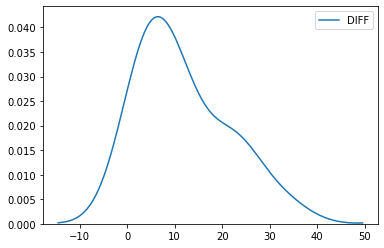

In [432]:
sns.kdeplot(final["DIFF"])

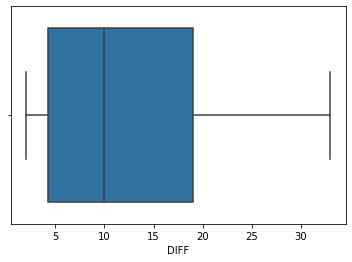

In [433]:
sns.boxplot(final["DIFF"])

Text(0.5, 1.0, 'Difference')

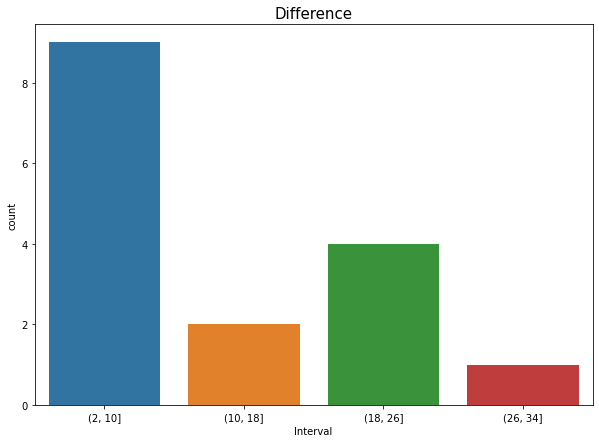

In [434]:
plt.figure(figsize=(10,7))
final["Interval"] = pd.cut(final["DIFF"],[2,10,18,26,34])
sns.countplot(final["Interval"])
plt.title("Difference",fontsize = 15)

From the above plots we can see that mostly the difference between their balls have been between 2-10 balls , which shows that both the teams are expected to take almost similar no of balls. So in this match also we can expect 0-7 balls difference between  the balls to reach team total of 75 runs.

## Balls Chahar will take for his 1st wicket

Since, we do not have sufficient data for Chahar as a CSK's bowler against KKR . So we need to consider his overall performance against KKR batsman.

- Overall

In [435]:
chahar = matches[matches["bowler"]=="DL Chahar"]
chahar = chahar[(chahar["wide_runs"]==0)&(chahar["noball_runs"]==0)]
chahar = chahar[chahar["dismissal_kind"]!="run out"]

In [436]:
chahar_dismissal = chahar.groupby(["match_id"]).agg({"ball":"count","player_dismissed":"count"})

chahar_dismissal.columns = ["total ball","wicket taken"]

chahar_dismissal = chahar_dismissal[chahar_dismissal["wicket taken"]>0]

print("Chahar's Performance :")
chahar_dismissal

Chahar's Performance :


,total ball,wicket taken
match_id,,
9,18,1
7894,18,1
7910,24,2
7913,24,3
7939,24,1
7945,18,1
7949,24,1
7950,24,1
11141,24,1


In [437]:
batsman = chahar.batsman.unique()
ball =[]
f = []
for value in chahar.groupby("match_id"):
    count = 0
    d = list(value[1]["player_dismissed"])
    f = list(value[1]["match_id"].unique())
    for i in d:
        count = count+1
        if(i in batsman):
            ball.append(count)
            break
ball

[1, 7, 12, 5, 9, 13, 11, 1, 15, 2, 9, 24, 6, 11, 16, 9, 24, 10, 5, 2, 9, 14]

In [438]:
chahar_dismissal["balls for 1st wicket"] = ball

chahar_dismissal

,total ball,wicket taken,balls for 1st wicket
match_id,,,
9,18,1,1
7894,18,1,7
7910,24,2,12
7913,24,3,5
7939,24,1,9
7945,18,1,13
7949,24,1,11
7950,24,1,1
11141,24,1,15


In [439]:
chahar_dismissal.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
balls for 1st wicket,22.0,9.772727,6.369061,1.0,5.25,9.0,12.75,24.0


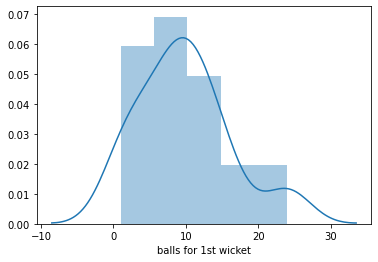

In [440]:
sns.distplot(chahar_dismissal["balls for 1st wicket"])

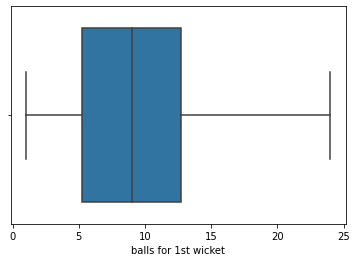

In [441]:
sns.boxplot(chahar_dismissal["balls for 1st wicket"])

In [442]:
print("Average balls taken by Chahar for his first wicket :{}".format(round(chahar_dismissal["balls for 1st wicket"].mean())))

Average balls taken by Chahar for his first wicket :10


Text(0.5, 1.0, 'Balls for 1st wicket')

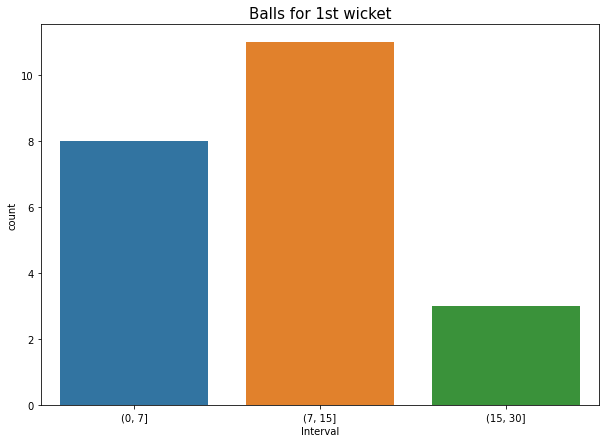

In [443]:
plt.figure(figsize=(10,7))
chahar_dismissal["Interval"] = pd.cut(chahar_dismissal["balls for 1st wicket"],[0,7,15,30])
sns.countplot(chahar_dismissal["Interval"])
plt.title("Balls for 1st wicket",fontsize = 15)

From the above plots we can see that mostly his first wicket comes in between 7-15 balls with a median at around 9 balls.
So we can predict that in this match also he is expected to take his first wicket in between 7-10 balls.

## Overs in the match where 6 and 4 both in same over.

In [444]:
col = KKR_CSK[["match_id","over","ball","batsman_runs"]]

four = col["batsman_runs"]==4
six = col["batsman_runs"]==6

four = four.replace({False:0 , True: 1})
six = six.replace({False:0 , True: 1})

four = list(four)
six = list(six) 

In [445]:
col["is_four"] = four
col["is_six"] = six

In [446]:
col

,match_id,over,ball,batsman_runs,is_four,is_six
16468,71,1,1,2,0,0
16469,71,1,2,1,0,0
16470,71,1,3,0,0,0
16471,71,1,4,1,0,0
16472,71,1,5,0,0,0
...,...,...,...,...,...,...
171795,11320,19,6,1,0,0
171796,11320,20,1,4,1,0
171797,11320,20,2,1,0,0
171798,11320,20,3,1,0,0


In [447]:
col12 = pd.DataFrame(col.groupby(["match_id","over"]).agg({"is_four":"sum","is_six":"sum"}))

col12

is_four  is_six
match_id over                 
71       1           2       0
         2           2       1
         3           1       1
         4           2       0
         5           5       0
...                ...     ...
11320    16          1       0
         17          1       0
         18          1       0
         19          3       0
         20          1       0

[357 rows x 2 columns]

In [448]:
final = col12[(col12["is_four"]>=1)&(col12["is_six"]>=1)]

final.reset_index(inplace = True)

In [449]:
final_over = pd.DataFrame(final.groupby("match_id")["over"].count())

print("Over where both four and six are hit:")
final_over

Over where both four and six are hit:


,over
match_id,
71,4
166,8
182,4
222,4
235,5
347,4
368,9
381,9
406,1


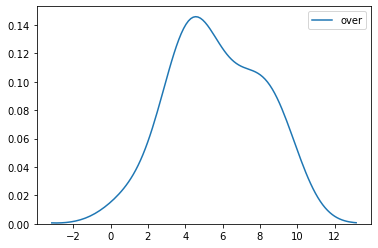

In [450]:
sns.kdeplot(final_over["over"])

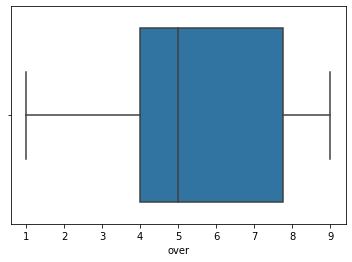

In [451]:
sns.boxplot(final_over["over"])

Text(0.5, 1.0, 'Balls for 1st wicket')

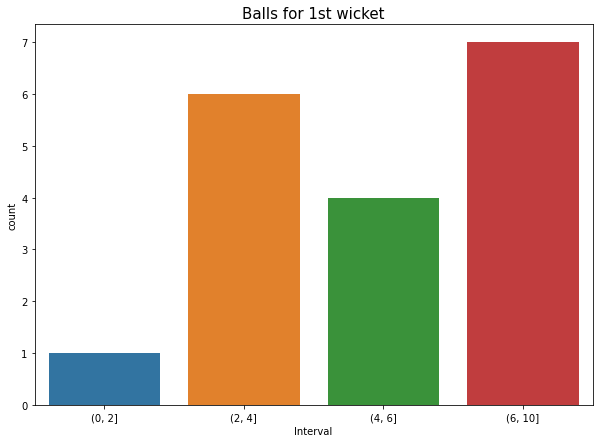

In [452]:
plt.figure(figsize=(10,7))
final_over["Interval"] = pd.cut(final_over["over"],[0,2,4,6,10])
sns.countplot(final_over["Interval"])
plt.title("Balls for 1st wicket",fontsize = 15)

In [453]:
print("Average no of overs expected to have both 4 and 6 in same over in this match :{}".format(round(final_over["over"].mean())))

Average no of overs expected to have both 4 and 6 in same over in this match :6


## Confidence Interval

In [454]:
final_over.describe().T

,count,mean,std,min,25%,50%,75%,max
over,18.0,5.666667,2.32632,1.0,4.0,5.0,7.75,9.0


In [455]:
mean = final_over["over"].mean()
sd = final_over["over"].std()
n = len(final_over)

n

18

In [456]:
tstar = 2.064
se = sd/np.sqrt(n)
se

0.5483188805533162

In [457]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("95% Confidence Interval for the overs that could have both 4 and 6 in same over in this match :{}".format((lcb, ucb)))

95% Confidence Interval for the overs that could have both 4 and 6 in same over in this match :(5.0, 7.0)


From the above analysis we can see that mostly 5+ such overs are present where both fours and sixes are hitted in the same over. So, for this match also we estimate the scenerio to repeat i.e. we expect 5+ overs with both boundary types in single over.

## No ball Analysis

In [458]:
nbcount = KKR_CSK[KKR_CSK["noball_runs"] >0]

nbcount.iloc[:,2:]

,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,bowling_team,over,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
16476,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,0,Chennai Super Kings,1,Kolkata Knight Riders,Chennai Super Kings,2,...,0,0,0,1,0,0,1,1,NaN,NaN
16573,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,0,Chennai Super Kings,1,Kolkata Knight Riders,Chennai Super Kings,17,...,0,0,0,1,0,0,1,1,NaN,NaN
16614,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,0,Chennai Super Kings,2,Chennai Super Kings,Kolkata Knight Riders,4,...,0,0,0,1,0,1,1,2,NaN,NaN
38917,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,0,Kolkata Knight Riders,2,Kolkata Knight Riders,Chennai Super Kings,3,...,0,0,0,1,0,4,1,5,NaN,NaN
81925,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,0,Kolkata Knight Riders,2,Kolkata Knight Riders,Chennai Super Kings,6,...,0,0,0,1,0,0,1,1,NaN,NaN
90019,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,0,Kolkata Knight Riders,1,Chennai Super Kings,Kolkata Knight Riders,6,...,0,0,0,1,0,0,1,1,NaN,NaN
90035,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,0,Kolkata Knight Riders,1,Chennai Super Kings,Kolkata Knight Riders,8,...,0,0,0,1,0,0,1,1,NaN,NaN
90229,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,0,Kolkata Knight Riders,2,Kolkata Knight Riders,Chennai Super Kings,19,...,0,0,0,1,0,2,1,3,NaN,NaN
99046,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,0,Chennai Super Kings,2,Kolkata Knight Riders,Chennai Super Kings,1,...,0,0,0,1,0,0,1,1,NaN,NaN
113270,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,0,Chennai Super Kings,1,Chennai Super Kings,Kolkata Knight Riders,16,...,0,0,0,1,0,0,1,1,NaN,NaN


In [459]:
nbcount.noball_runs.value_counts()

1    15
Name: noball_runs, dtype: int64

In [460]:
runs_from_noballs = nbcount.noball_runs.sum()

print("Runs from no ball delivery (overall) :",runs_from_noballs)

Runs from no ball delivery (overall) : 15


In [461]:
no_balls_per_match = pd.DataFrame(nbcount.groupby(["match_id","bowling_team"])["noball_runs"].count())

no_balls_per_match.columns = ["noball count"]

no_balls_per_match.reset_index(inplace = True)

print("No balls bowled in RR VS SRH matches :")
no_balls_per_match

No balls bowled in RR VS SRH matches :


,match_id,bowling_team,noball count
0,71,Chennai Super Kings,2
1,71,Kolkata Knight Riders,1
2,166,Chennai Super Kings,1
3,347,Chennai Super Kings,1
4,381,Chennai Super Kings,1
5,381,Kolkata Knight Riders,2
6,418,Chennai Super Kings,1
7,478,Chennai Super Kings,1
8,478,Kolkata Knight Riders,1
9,504,Kolkata Knight Riders,1


In [462]:
count = KKR_CSK.match_id.nunique()

no_balls = no_balls_per_match.match_id.nunique()

Avg_no_ball = (no_balls/count) * 100

print("Chances of no balls in KKR VS RCB matches (overall): {}%".format(round(Avg_no_ball)))

Chances of no balls in KKR VS RCB matches (overall): 50%


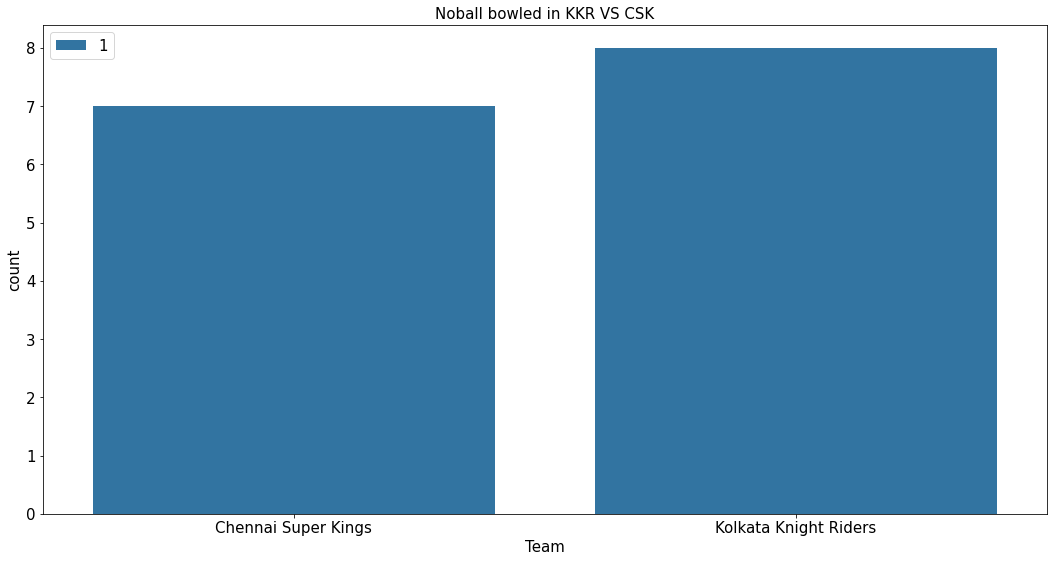

In [463]:
plt.figure(figsize = (18,9))
sns.countplot(nbcount['bowling_team'],hue=nbcount['noball_runs'])
plt.title('Noball bowled in KKR VS CSK',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Team',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.legend(loc="best",fontsize=15)

plt.show()

This shows that equal no of chances are there from both the teams to ball noball in KKR VS CSK matches. So, for this match we can predict the no ball count to be 0-1.